In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
import pei.myfunctions as mf
from xhistogram.xarray import histogram
from cartopy import crs as ccrs
import cartopy.feature as cfeature

# Load Data

In [2]:
# Load binned WBT data
ds = xr.open_dataset('../data/processed/WBT_binned.nc')

# Plot Time Series for Three Thresholds

In [4]:
def plot_thres3(region,ds,ax):
    # Get data for region
    ds_region = ds[region]
    
    # Normalize data to get PDF, then make a percent
    ds_region = 100*ds_region/ds_region.sum(['WBT_bin','ensemble'])
    
    # Plot fraction of days per year above threshold temperatures
    ds_region.sel(WBT_bin=slice(25,None)).sum(['WBT_bin','ensemble']).plot(ax=ax)
    ds_region.sel(WBT_bin=slice(27.9,None)).sum(['WBT_bin','ensemble']).plot(ax=ax)
    ds_region.sel(WBT_bin=slice(30,None)).sum(['WBT_bin','ensemble']).plot(ax=ax)

    ax.set_xlabel('Year')
    ax.set_ylabel('% of Days in Year')
    ax.set_title('Percent of Days With Maximum WBT Above Threshold Values: '+region)
    ax.legend(['25   $^\circ$C','27.9$^\circ$C','30   $^\circ$C'],loc='upper left')
    #fig.savefig(region+'thres.png')

# Side-by-Side Plots

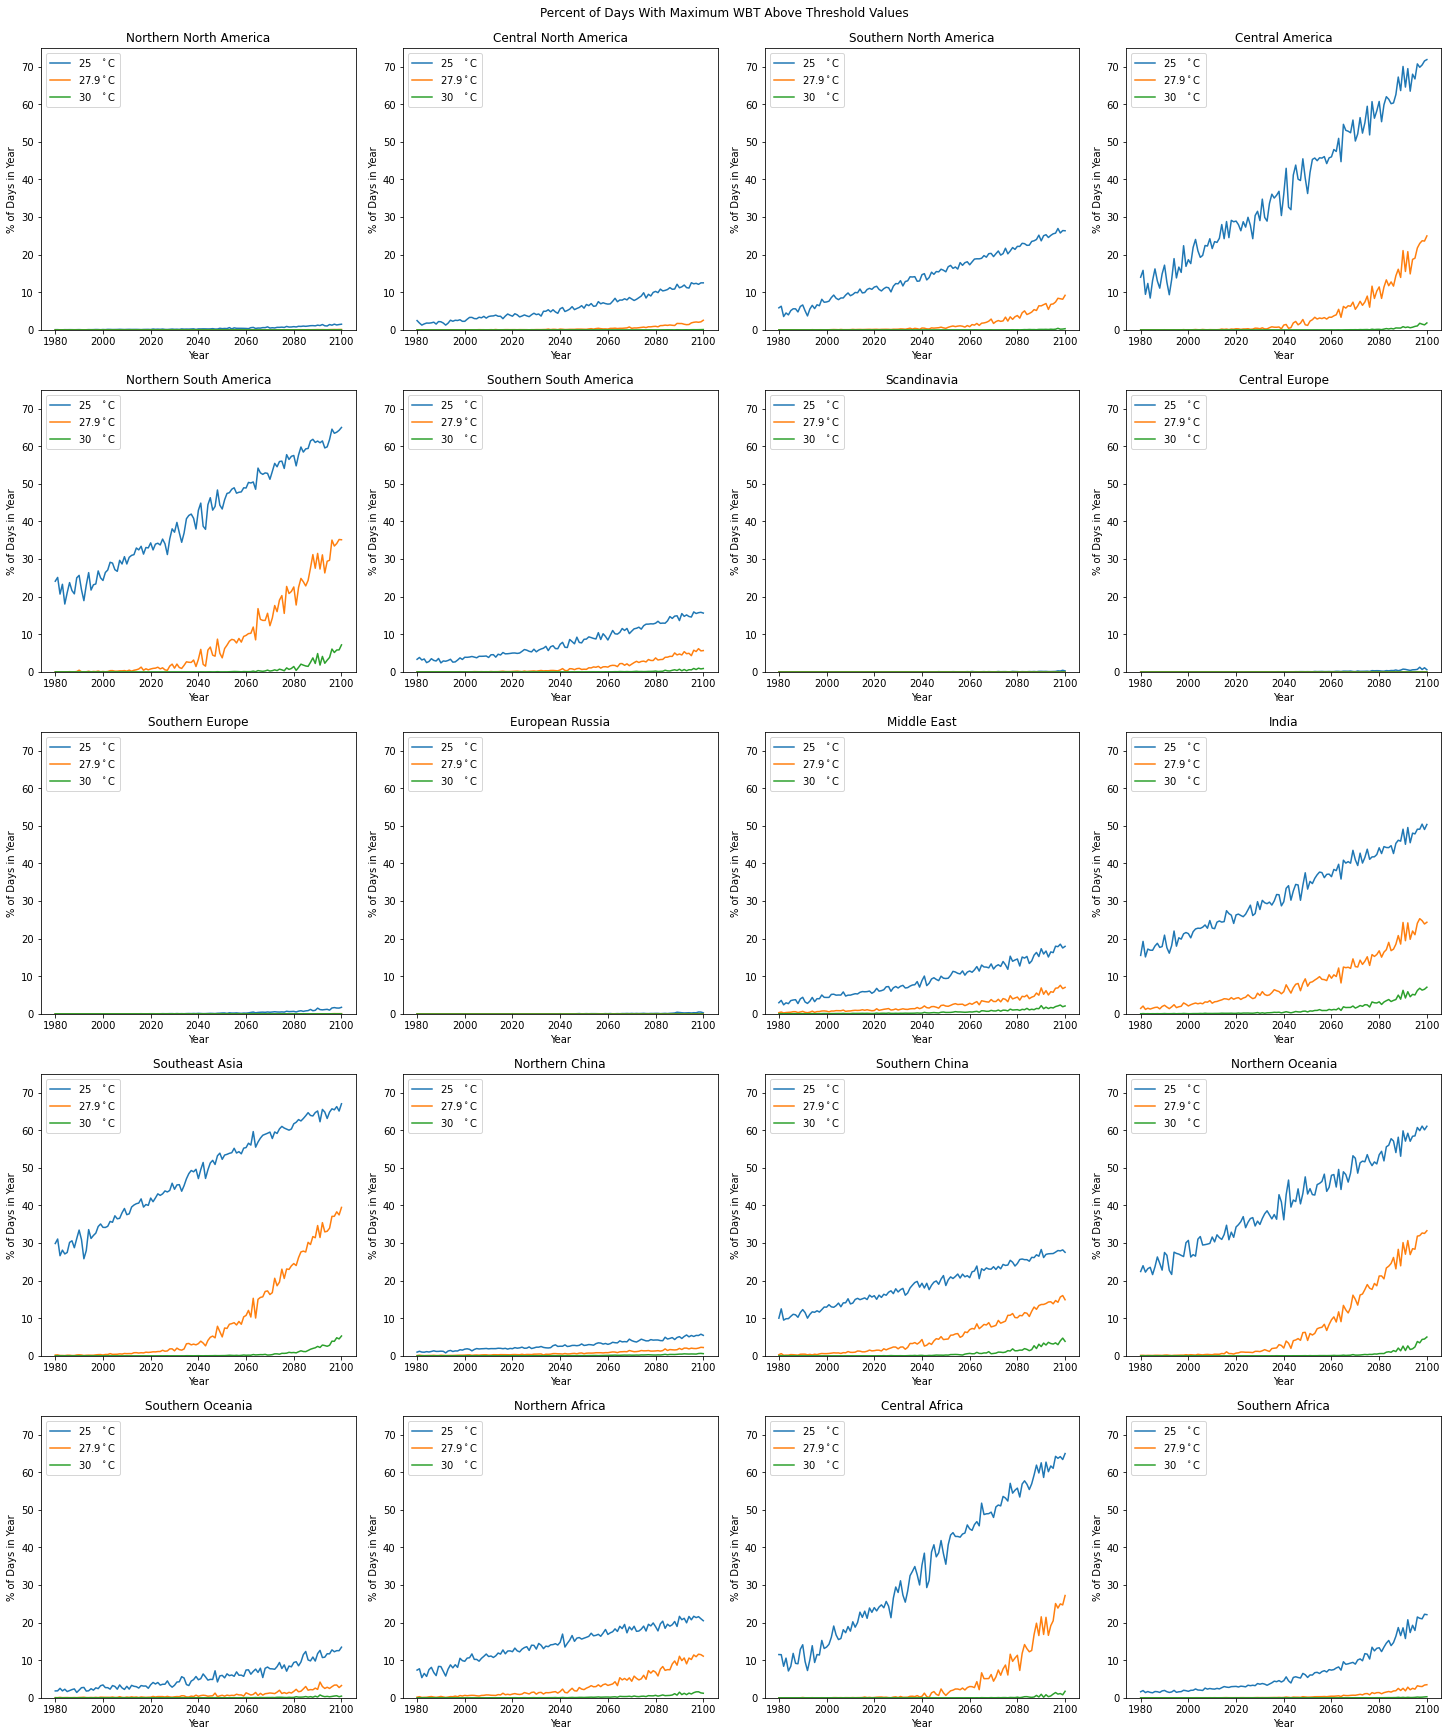

In [8]:
regions = ['Northern North America','Central North America','Southern North America',
          'Central America','Northern South America','Southern South America',
          'Scandinavia','Central Europe','Southern Europe','European Russia',
          'Middle East','India','Southeast Asia','Northern China','Southern China',
          'Northern Oceania','Southern Oceania',
          'Northern Africa','Central Africa','Southern Africa']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,24),nrows=5,ncols=4,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/4)][index%4]
    index+=1
    
    plot_thres3(region,ds,ax)
    ax.set_ylim(0,75)
    ax.set_title(region)
    
fig.suptitle('Percent of Days With Maximum WBT Above Threshold Values')
fig.savefig('alltimeseries.png')

# Side-by-Side Plots, Relevant Regions

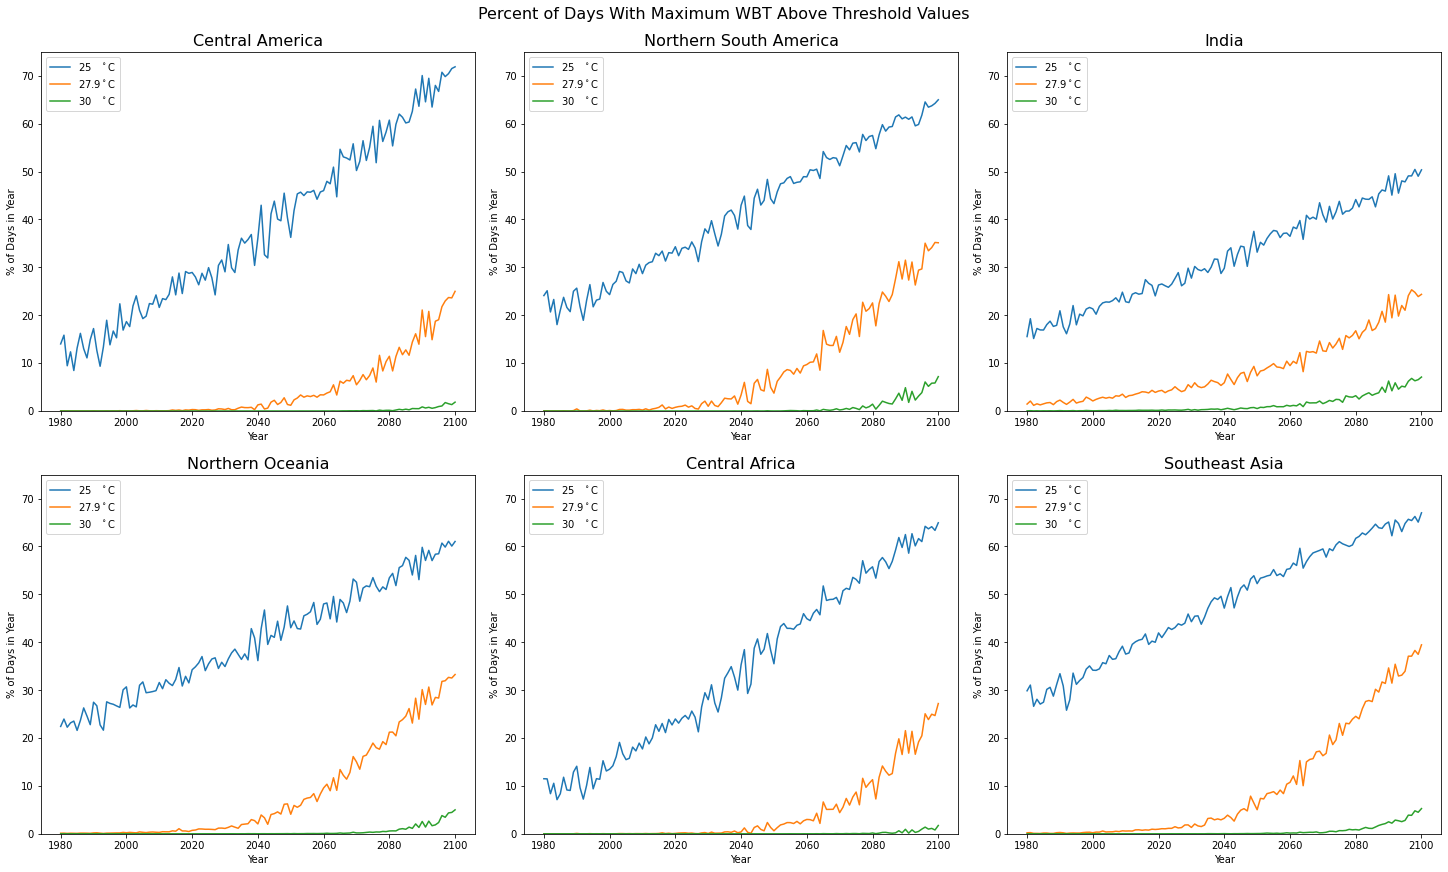

In [40]:
regions = ['Central America','Northern South America','India','Northern Oceania','Central Africa','Southeast Asia']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,12),nrows=2,ncols=3,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/3)][index%3]
    index+=1
    
    plot_thres3(region,ds,ax)
    ax.set_ylim(0,75)
    ax.set_title(region,fontsize=16)
    
fig.suptitle('Percent of Days With Maximum WBT Above Threshold Values',fontsize=16)
fig.savefig('relevant_timeseries.png')

# Side-by-Side Plots, Colder Regions

Text(0.5, 0.98, 'Percent of Days With Maximum WBT Above Threshold Values')

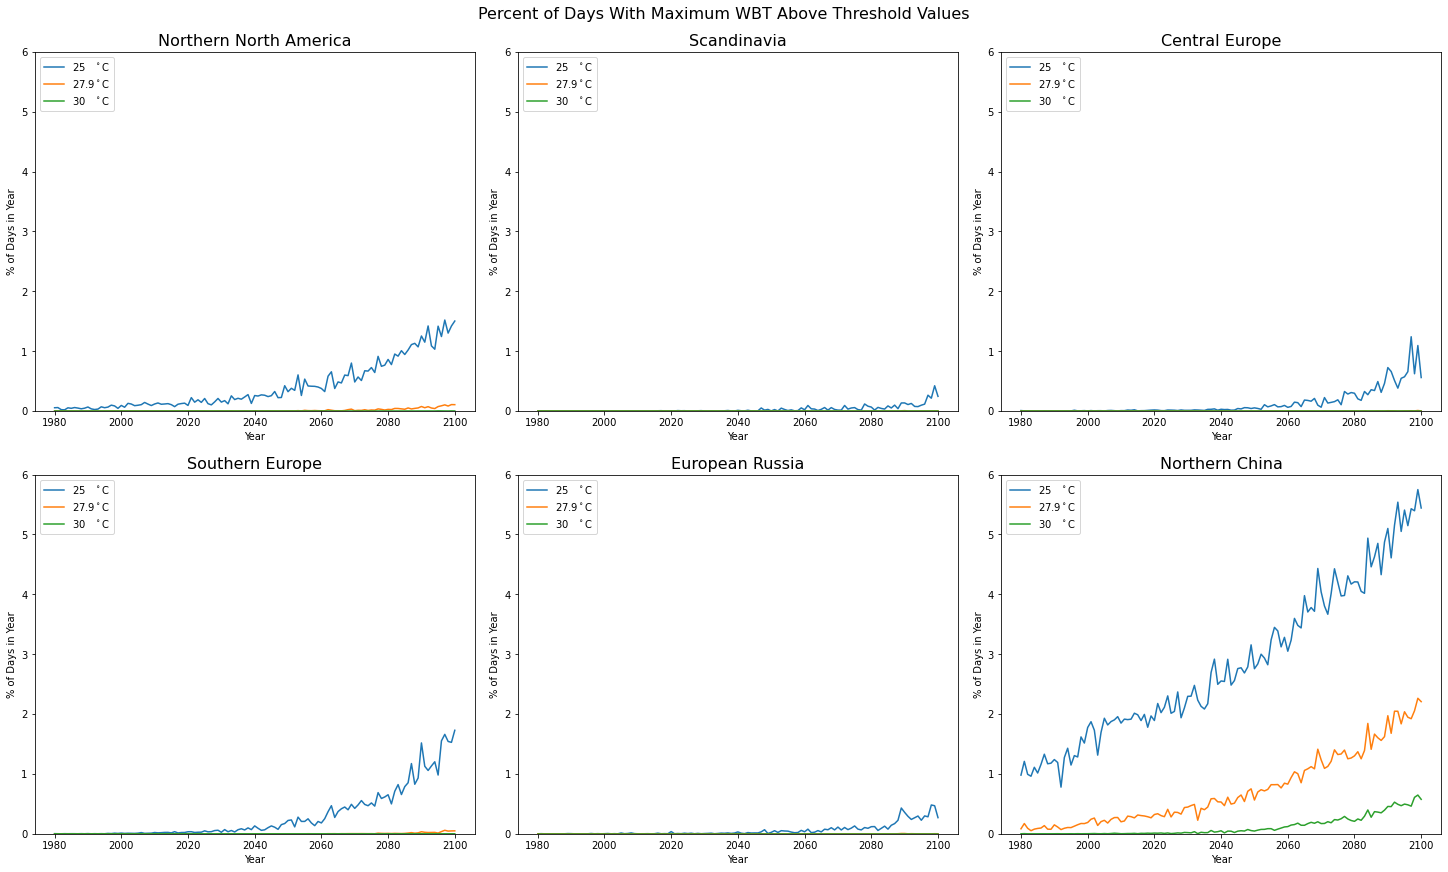

In [7]:
regions = ['Northern North America','Scandinavia','Central Europe','Southern Europe','European Russia','Northern China']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,12),nrows=2,ncols=3,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/3)][index%3]
    index+=1
    
    plot_thres3(region,ds,ax)
    ax.set_ylim(0,6)
    ax.set_title(region,fontsize=16)
    
fig.suptitle('Percent of Days With Maximum WBT Above Threshold Values',fontsize=16)

# Rolling Mean

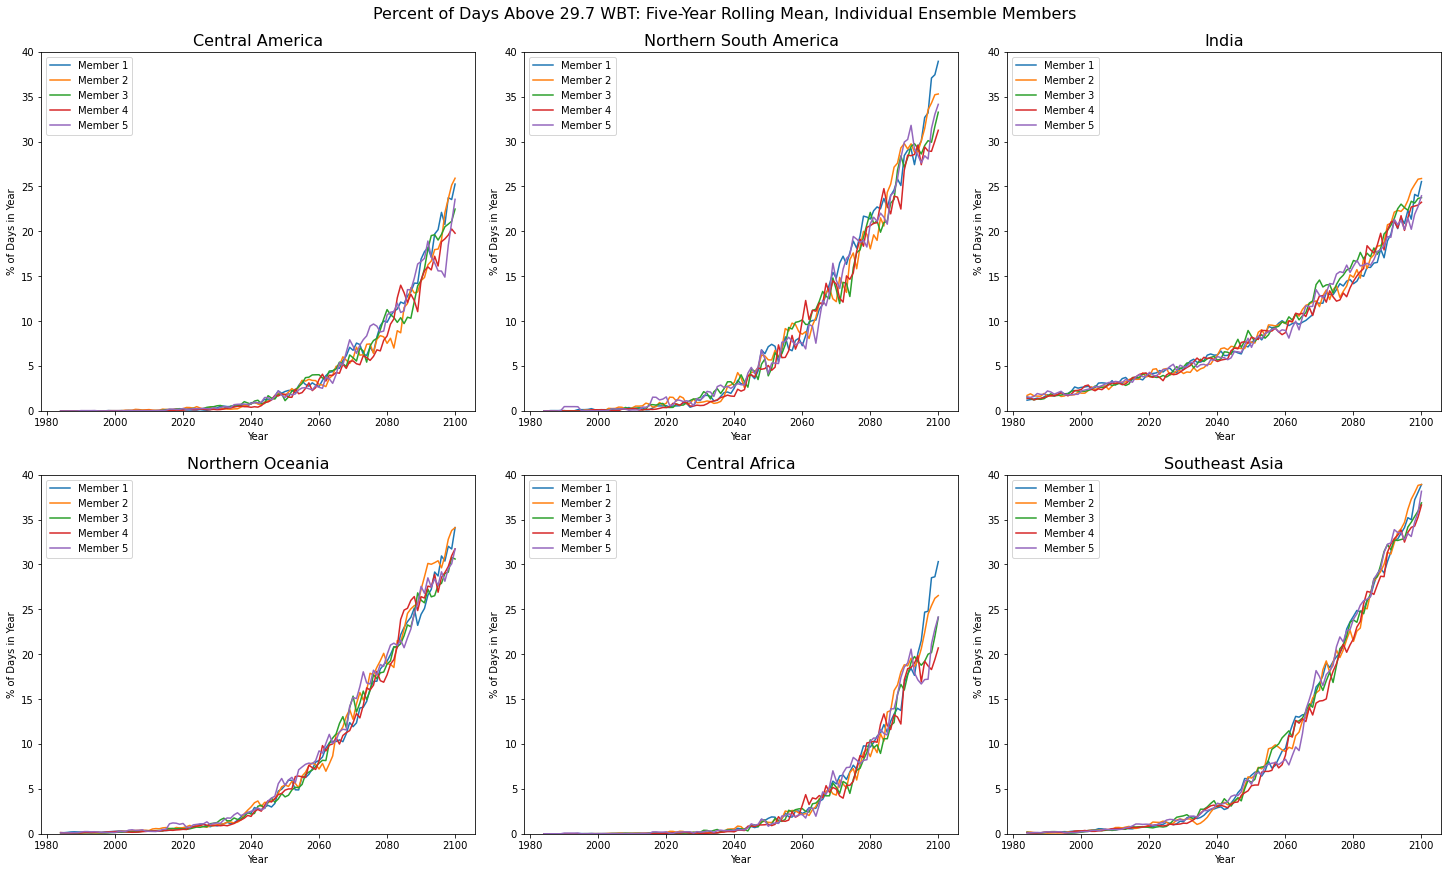

In [61]:
regions = ['Central America','Northern South America','India','Northern Oceania','Central Africa','Southeast Asia']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,12),nrows=2,ncols=3,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/3)][index%3]
    index+=1
    
    # Get data for region
    ds_region = ds[region]
    
    # Normalize data to get PDF, then make a percent
    ds_region = 100*ds_region/ds_region.sum(['WBT_bin'])
    
    # Isolate data above threshold temperature
    ds_region = ds_region.sel(WBT_bin=slice(27.9,None))
    
    # Loop through ensemble members
    for i in range (0,5):
        ds_ens = ds_region.isel(ensemble=i).sum(['WBT_bin']).rolling(year=5).mean().dropna('year')
        ds_ens.plot(ax=ax)

    ax.set_xlabel('Year')
    ax.set_ylabel('% of Days in Year')
    ax.set_ylim(0,40)
    ax.set_title(region,fontsize=16)
    ax.legend(['Member 1','Member 2','Member 3','Member 4','Member 5'],loc='upper left')
    
fig.suptitle('Percent of Days Above 29.7 WBT: Five-Year Rolling Mean, Individual Ensemble Members',fontsize=16)
fig.savefig('rolling_timeseries.png')

# Updated Histograms

In [14]:
def hist(region,ds,ax):
    # Get data for region
    ds_region = ds[region]

    # Sum distributions over relevant decades
    ds_1980 = ds_region.sel(year = slice(1980,1989)).sum(['ensemble','year'])
    ds_2090 = ds_region.sel(year = slice(2090,2099)).sum(['ensemble','year'])

    # Normalize data to get PDF
    ds_1980 = ds_1980/ds_1980.sum()
    ds_2090 = ds_2090/ds_2090.sum()

    # Plot distributions
    ds_1980.plot(ax=ax)
    ds_2090.plot(ax=ax)

    # Set labels
    ax.set_xlabel('WBT (Celsius)')
    ax.set_ylabel('Frequency')
    ax.legend(['1980-1990','2090-2100'], loc='upper left')

# Side-by-Side Histograms

Text(0.5, 0.98, 'Decadal Distributions of Daily Maximum WBT: 1980s vs 2090s')

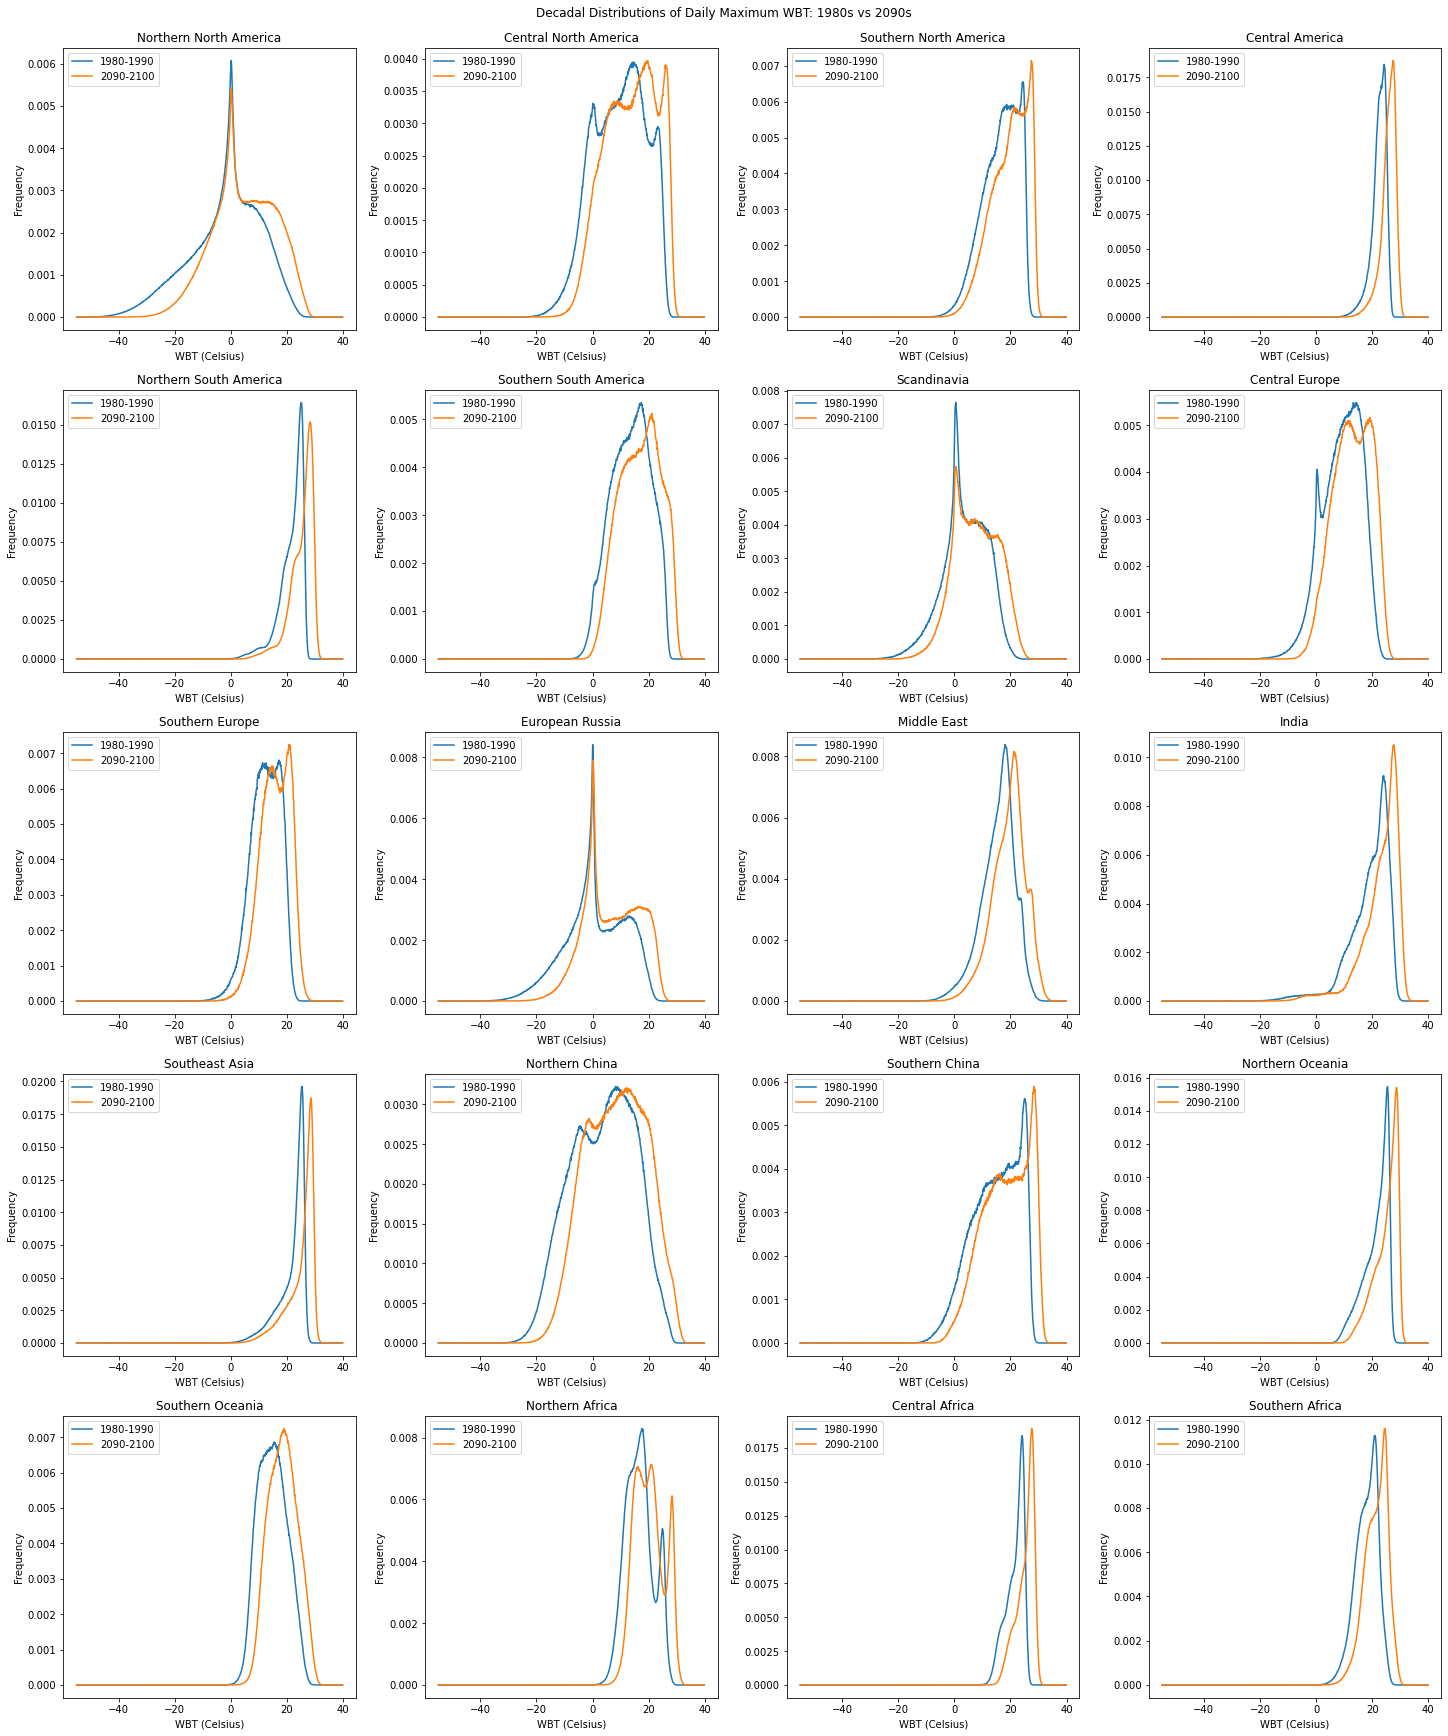

In [27]:
regions = ['Northern North America','Central North America','Southern North America',
          'Central America','Northern South America','Southern South America',
          'Scandinavia','Central Europe','Southern Europe','European Russia',
          'Middle East','India','Southeast Asia','Northern China','Southern China',
          'Northern Oceania','Southern Oceania',
          'Northern Africa','Central Africa','Southern Africa']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,24),nrows=5,ncols=4,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/4)][index%4]
    index+=1
    
    hist(region,ds,ax)
    ax.set_title(region)
    
fig.suptitle('Decadal Distributions of Daily Maximum WBT: 1980s vs 2090s')

# Side-by-Side Histograms, Relevant Regions

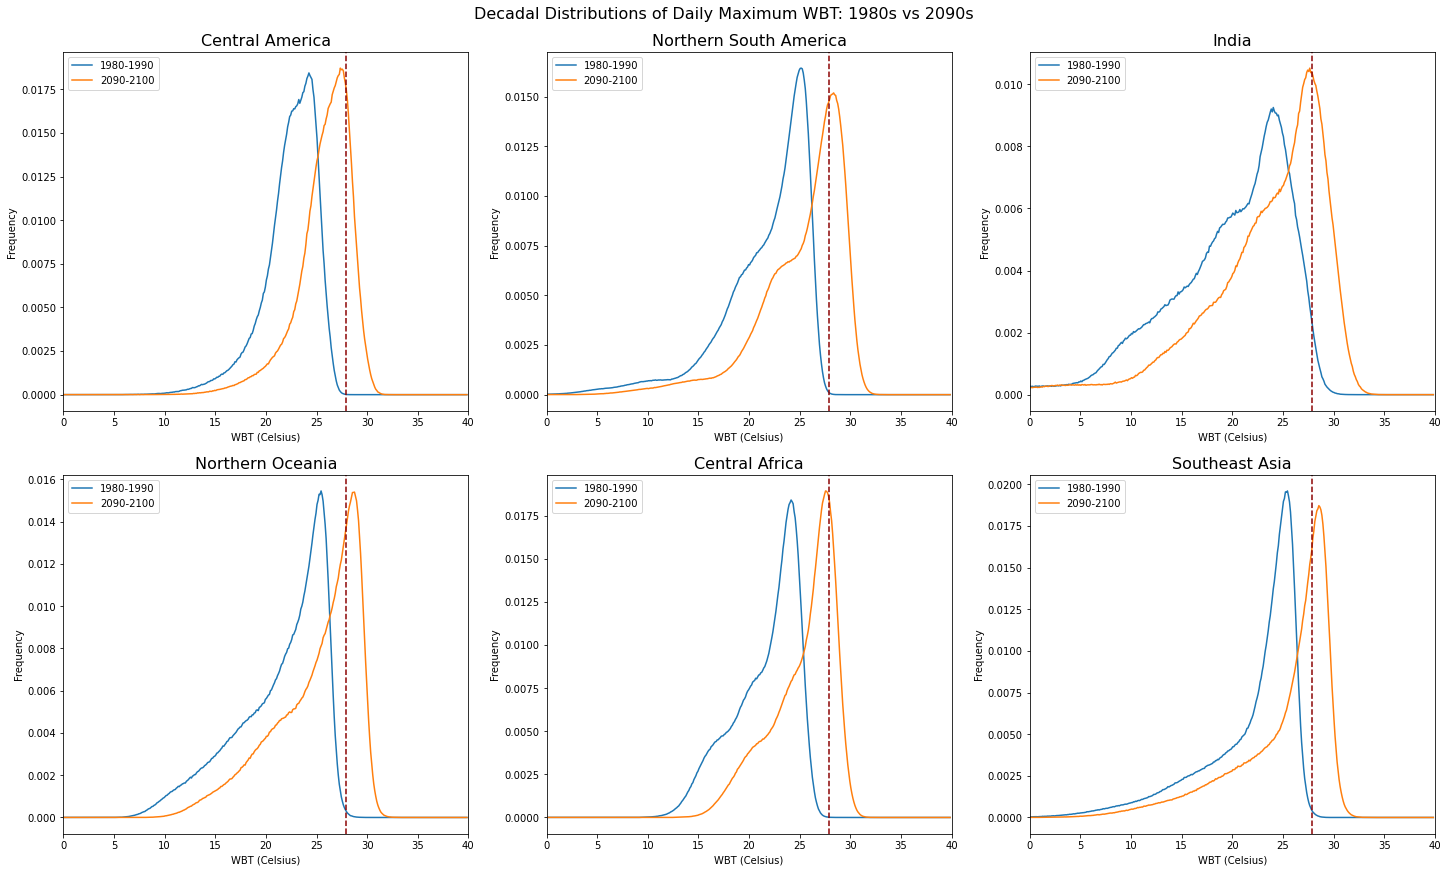

In [22]:
regions = ['Central America','Northern South America','India','Northern Oceania','Central Africa','Southeast Asia']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,12),nrows=2,ncols=3,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/3)][index%3]
    index+=1
    
    hist(region,ds,ax)
    ax.set_title(region,fontsize=16)
    ax.set_xlim([0,40])
    ax.axvline(27.9,linestyle='--',color='darkred')
    
fig.suptitle('Decadal Distributions of Daily Maximum WBT: 1980s vs 2090s',fontsize=16)
fig.savefig('hist_thres.png')

# Map Regions

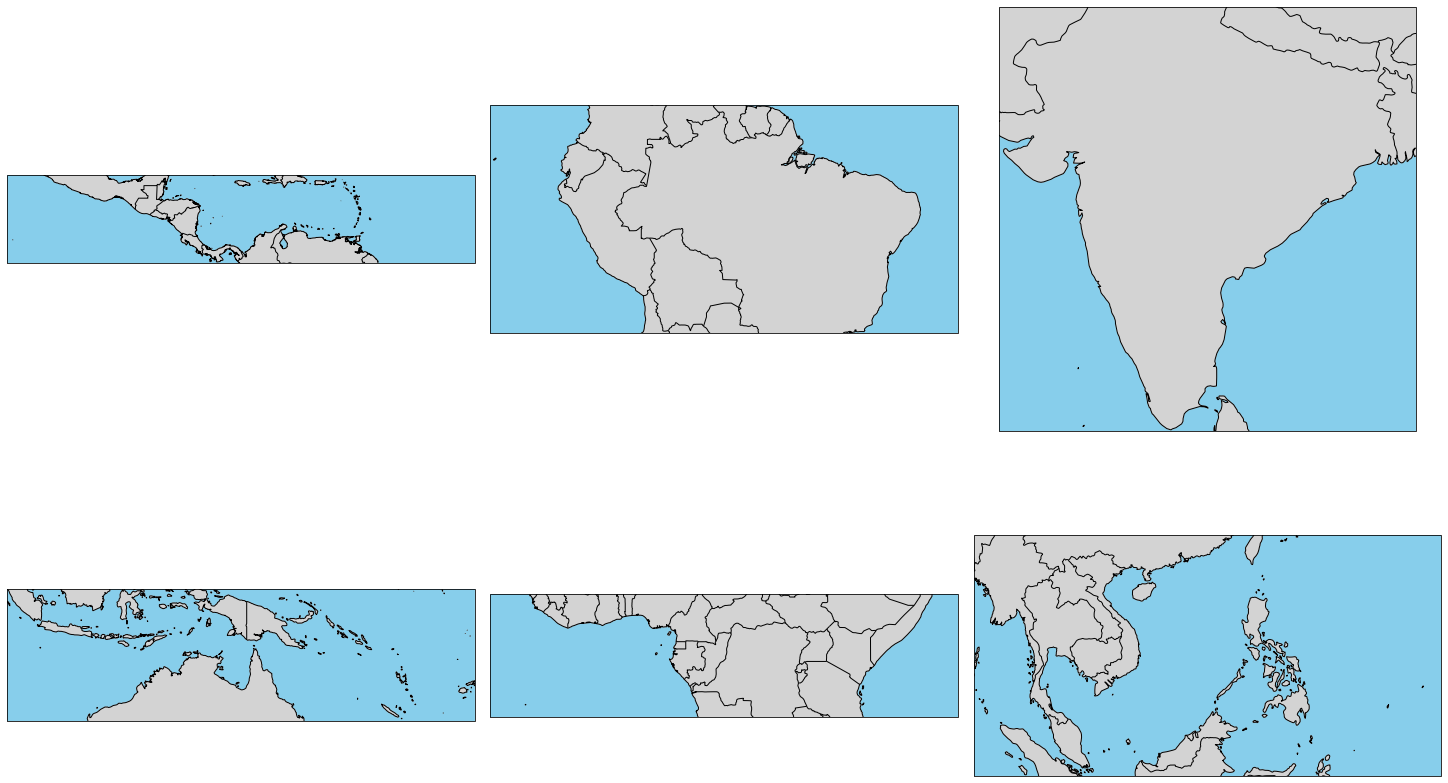

In [18]:
regions = ['Central America','Northern South America','India','Northern Oceania','Central Africa','Southeast Asia']

# Specify projection
crs = ccrs.PlateCarree()

fig, axs = plt.subplots(figsize=(20,12),nrows=2,ncols=3,constrained_layout=True,subplot_kw={'projection':crs})

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/3)][index%3]
    index+=1
    
    # Get longitude and latitude bounds for mask
    xmin = mf.masks[region][0][0]
    if xmin > 180:
        xmin -= 360
    xmax = mf.masks[region][0][-1]
    if xmax > 180:
        xmax -= 360
    ymin = mf.masks[region][1][0]
    ymax = mf.masks[region][1][-1]
    ax.set_extent([xmin,xmax,ymin,ymax],crs=crs)
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS.with_scale('50m'))
    ax.add_feature(cfeature.OCEAN, color='skyblue')
    ax.add_feature(cfeature.LAND, color='lightgrey')

# Histograms by Ensemble

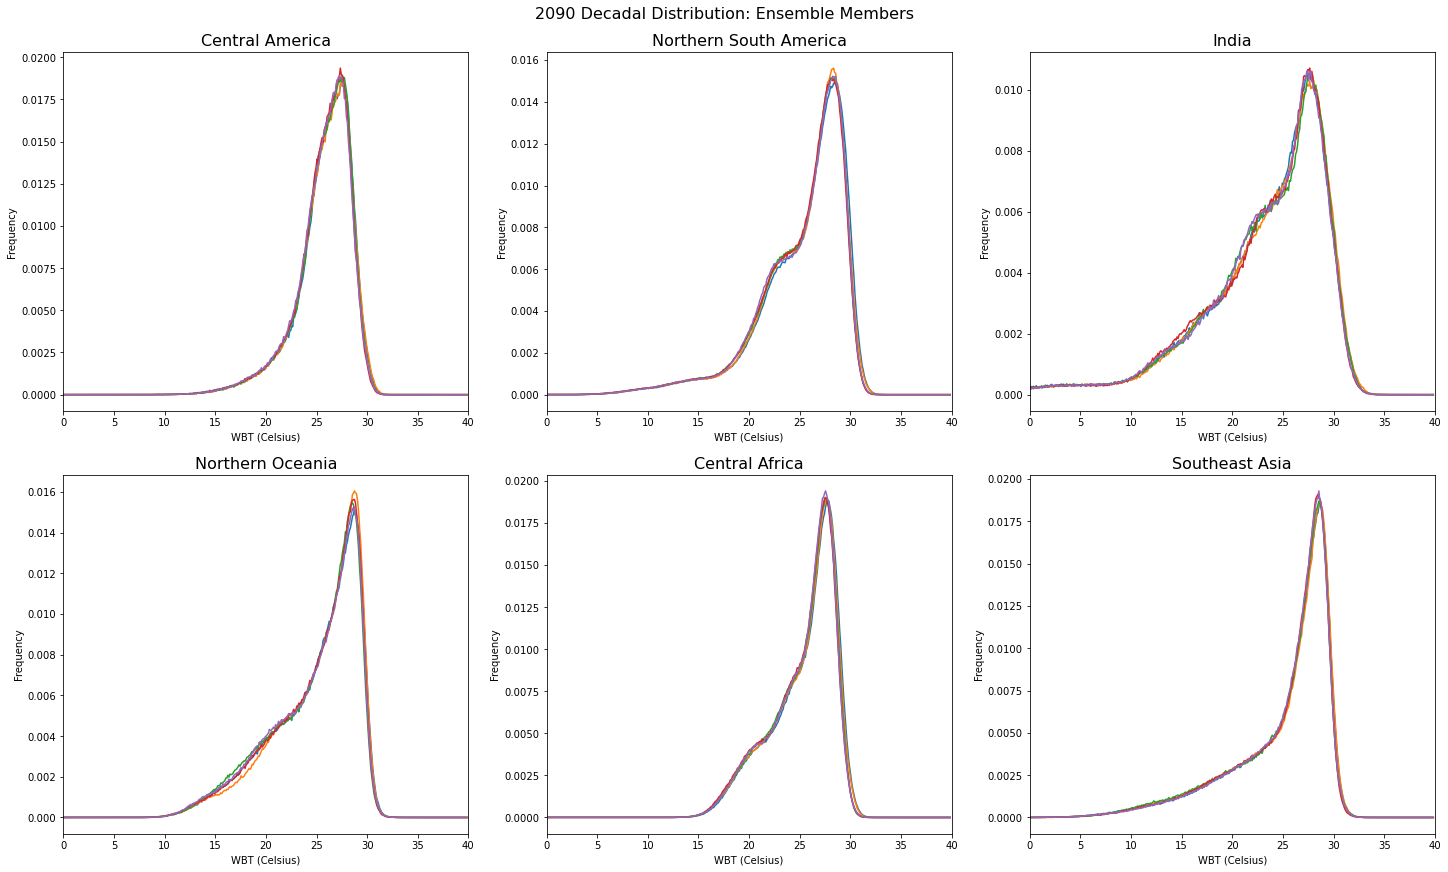

In [3]:
regions = ['Central America','Northern South America','India','Northern Oceania','Central Africa','Southeast Asia']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,12),nrows=2,ncols=3,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/3)][index%3]
    index+=1
    
    ds_region = ds[region]
    ds_2090 = ds_region.sel(year = slice(2090,2099)).sum(['year'])
    ds_2090 = ds_2090/ds_2090.sum(['WBT_bin'])
    
    for i in range (0,5):
        ds_2090.isel(ensemble=i).plot(ax=ax)
    
    ax.set_title(region,fontsize=16)
    ax.set_xlim([0,40])
    ax.set_xlabel('WBT (Celsius)')
    ax.set_ylabel('Frequency')
fig.suptitle('2090 Decadal Distribution: Ensemble Members',fontsize=16)
fig.savefig('ensemble_hist.png')

# Combined Histograms

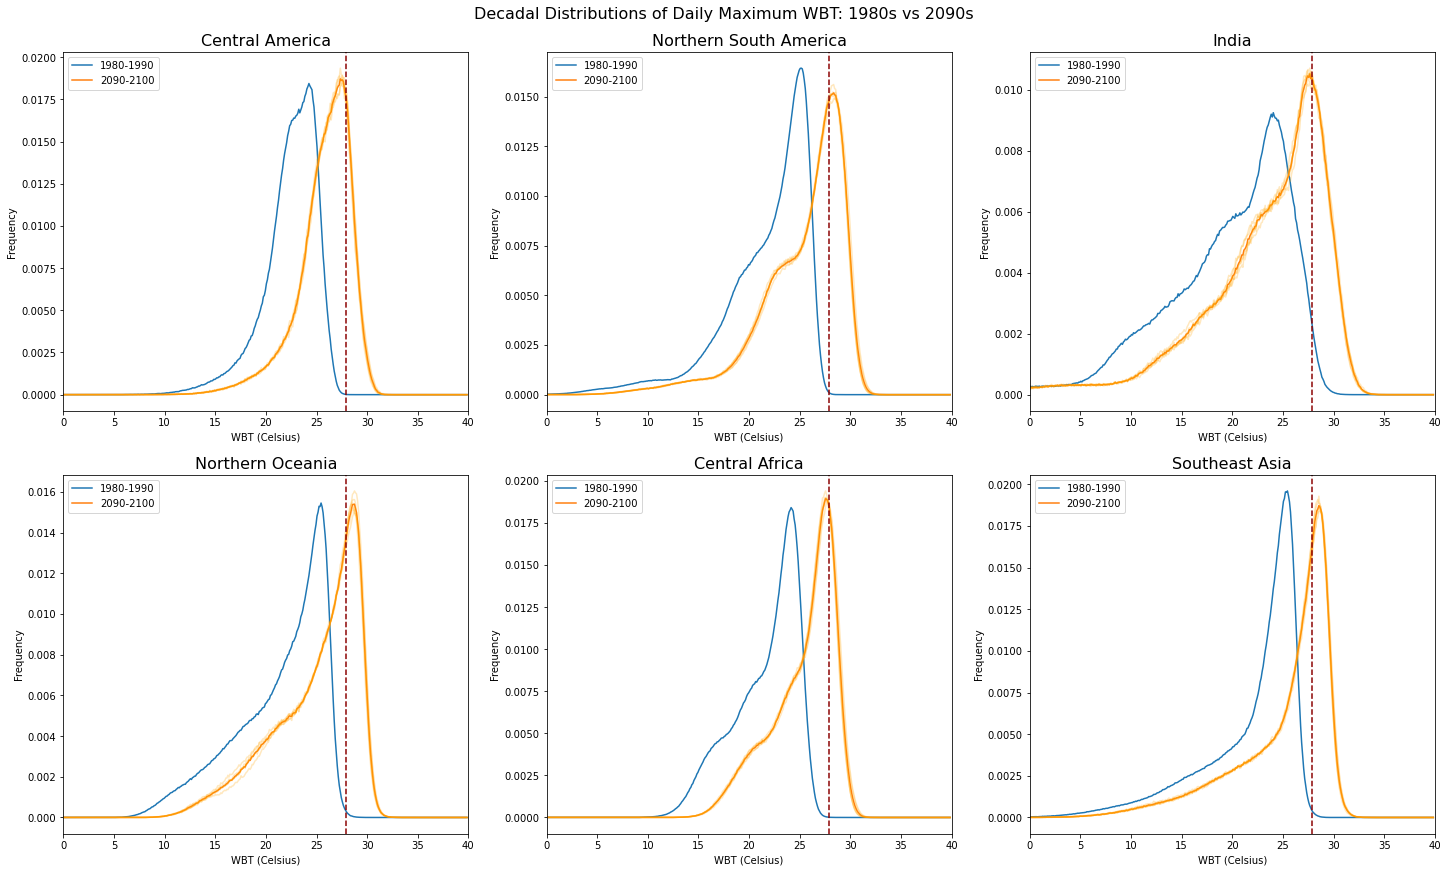

In [23]:
regions = ['Central America','Northern South America','India','Northern Oceania','Central Africa','Southeast Asia']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,12),nrows=2,ncols=3,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/3)][index%3]
    index+=1
    
    # Plot two averages
    hist(region,ds,ax)
    
    # Plot 2090 ensemble members
    ds_region = ds[region]
    ds_2090 = ds_region.sel(year = slice(2090,2099)).sum(['year'])
    ds_2090 = ds_2090/ds_2090.sum(['WBT_bin'])
    
    for i in range (0,5):
        ds_2090.isel(ensemble=i).plot(ax=ax,color='orange',alpha=0.25)
        
    ax.set_title(region,fontsize=16)
    ax.set_xlabel('WBT (Celsius)')
    ax.set_ylabel('Frequency')
    ax.set_xlim([0,40])
    ax.axvline(27.9,linestyle='--',color='darkred')
    
fig.suptitle('Decadal Distributions of Daily Maximum WBT: 1980s vs 2090s',fontsize=16)
fig.savefig('new_ensemble_hist.png')